# Seaborn

## Aspectos generales

Seaborn es un paquete basado en Matplotlib, que provee una interfaz de más alto nivel para hacer gráficos y utiliza fuertemente Pandas como fuente de datos. La estructura de seaborn radica en tres módulos:

1. Relaciones
2. Distribuciones
3. Categóricos

Para cada tipo de módulo existen funciones a nivel de ejes y a nivel de figura. 

Por ejemplo, una función "a nivel de ejes" en el módulo de distribuciones es la que hace un histograma:

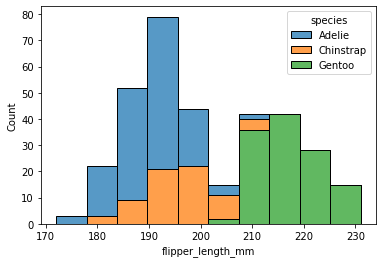

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

penguins = sns.load_dataset("penguins")
sns.histplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

pero existe otra que hace una estimación por kernel de la densidad:

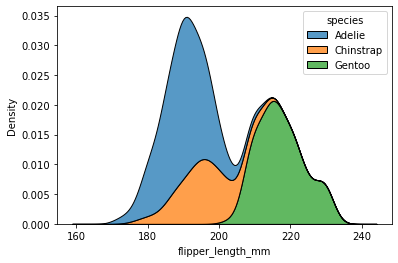

In [4]:
sns.kdeplot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

pero existe una función "a nivel de figura" que puede hacer ambas, con algunas diferencias en formato:

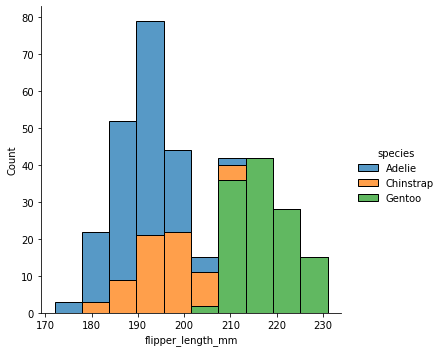

In [5]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack");

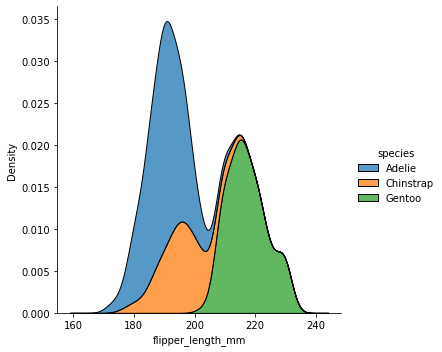

In [6]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", multiple="stack", kind="kde");

La mayor ventaja de los gráficos "a nivel de figura" es que se pueden crear fácilmente facets:

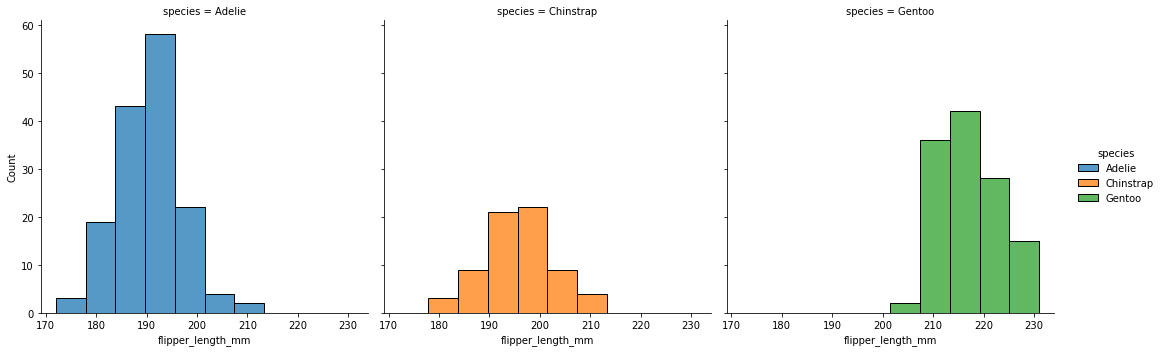

In [7]:
sns.displot(data=penguins, x="flipper_length_mm", hue="species", col="species");

Las funciones a nivel de ejes se pueden considerar como "wrappers" de gráficos de Matplotlib, por lo tanto pueden ser "arreglados" en un objeto tipo ejes (axes):

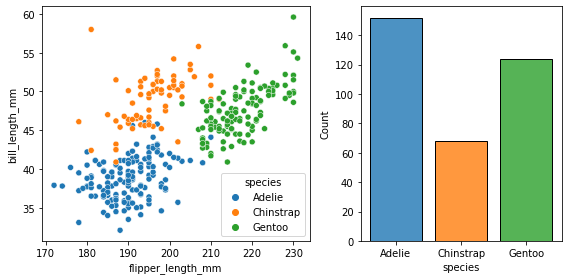

In [8]:
f, axs = plt.subplots(1, 2, figsize=(8, 4), gridspec_kw=dict(width_ratios=[4, 3]))
sns.scatterplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species", ax=axs[0])
sns.histplot(data=penguins, x="species", hue="species", shrink=.8, alpha=.8, legend=False, ax=axs[1])
f.tight_layout()


Para resumir los tres módulos con sus gráficos a nivel de figura y ejes:

![alt text](data/function_overview_8_0.png)

Los gráficos a nivel de figura pueden ser configurados a través de sus métodos:

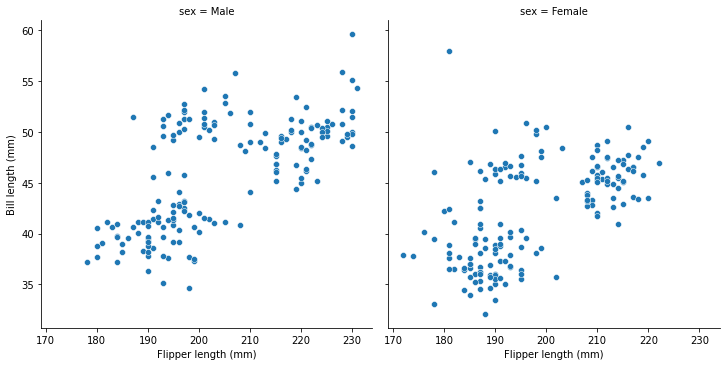

In [9]:
g = sns.relplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", col="sex")
g.set_axis_labels("Flipper length (mm)", "Bill length (mm)");


y estos ofrecen mayores ventajas a la hora de configurarlos con respecto a los gráficos a nivel de ejes. 

Existen dos excepciones a la clasificación anterior de gráficos en seaborn: `jointplot()` y `pairplot()`: 

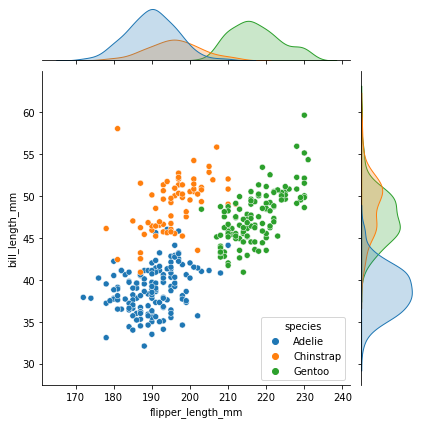

In [10]:
sns.jointplot(data=penguins, x="flipper_length_mm", y="bill_length_mm", hue="species");

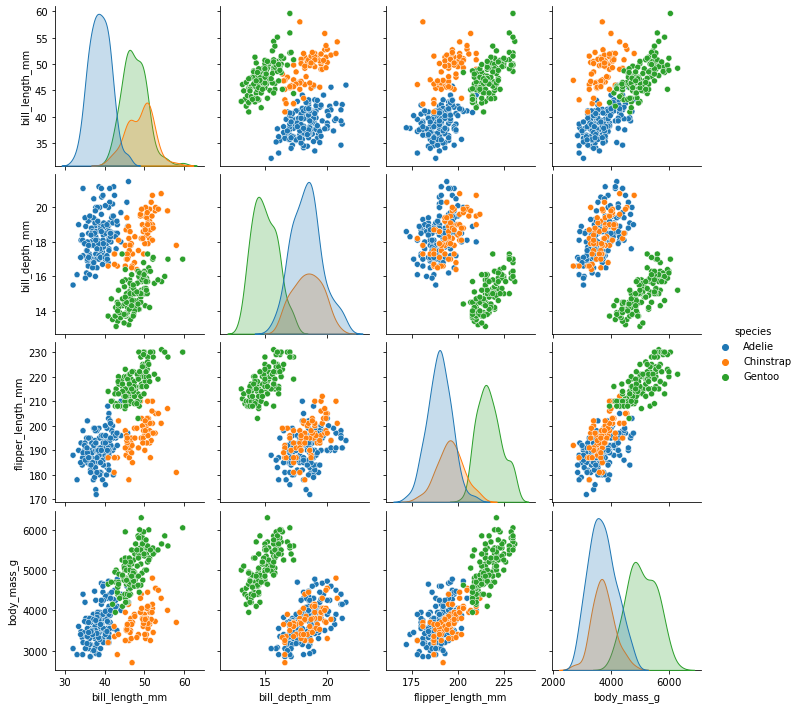

In [11]:
sns.pairplot(data=penguins, hue="species");

## Estructuras de datos utilizadas en seaborn

Seaborn acepta tablas en formato largo:

In [12]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


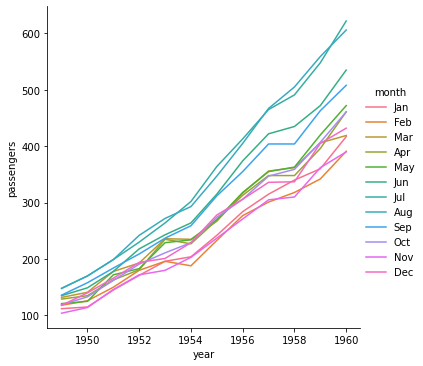

In [13]:
sns.relplot(data=flights, x="year", y="passengers", hue="month", kind="line");

Seaborn también acepta datos en formato ancho (típico de tablas pivot):

In [14]:
flights_wide = flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


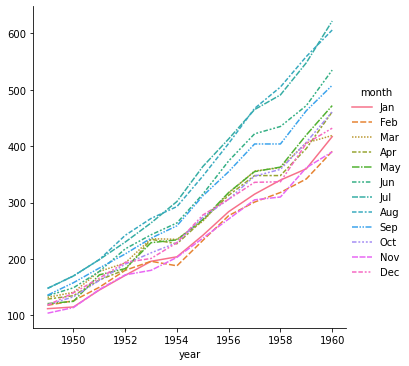

In [15]:
sns.relplot(data=flights_wide, kind="line");

En este ejemplo también podemos graficar el comportamiento de la serie mensual en los distintos años. Primero usando los datos en formato largo:

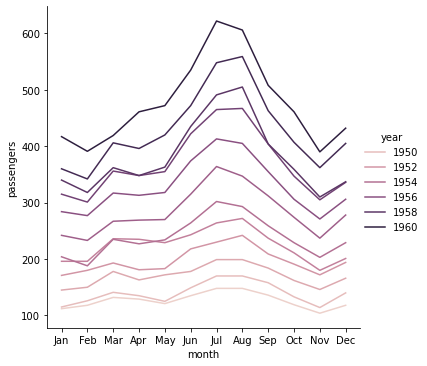

In [16]:
sns.relplot(data=flights, x="month", y="passengers", hue="year", kind="line");

y también en formato ancho (noten que en este caso hay que transponer el DataFrame paa que los ejes aparezcan correctamente):

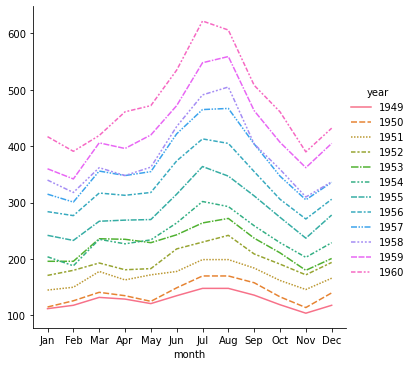

In [17]:
sns.relplot(data=flights_wide.transpose(), kind="line");

Seaborn no solamente utiliza DataFrames y Series de Pandas, sino también se puede usar diccionarios y arrays de NumPy. También se puede usar DataFrames que hayan sido obtenidos usando operaciones de agrupamiento:

In [18]:
flights_avg = flights.groupby("year").mean()
flights_avg.head()

,passengers
year,
1949,126.666667
1950,139.666667
1951,170.166667
1952,197.000000
1953,225.000000


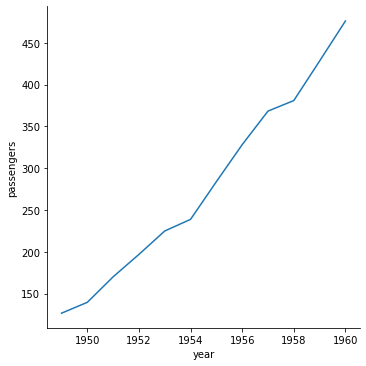

In [19]:
sns.relplot(data=flights_avg, x="year", y="passengers", kind="line");

Las series pueden tener distinta longuitud, siempre y cuando tengan un índice en común:

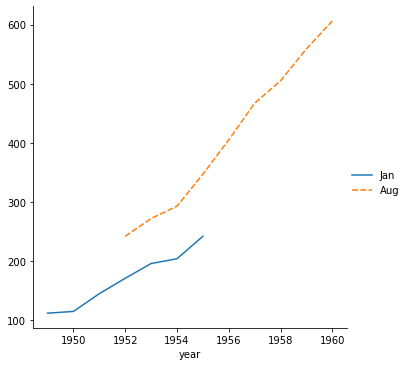

In [20]:
two_series = [flights_wide.loc[:1955, "Jan"], flights_wide.loc[1952:, "Aug"]]
sns.relplot(data=two_series, kind="line");

Si se usan arrays de NumPy con seaborn, los gráficos son indexados de manera ordinal:

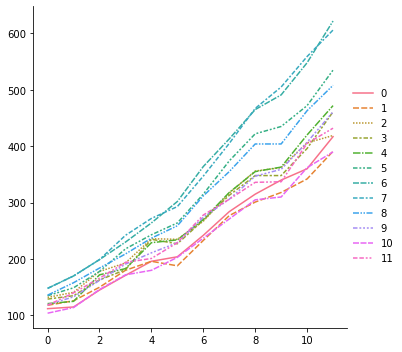

In [21]:
flights_array = flights_wide.to_numpy()
sns.relplot(data=flights_array, kind="line");

# Visualizando relaciones estadísticas

En la sección vimos como podemos gráficar a nivel de ejes y a nivel de figuras.

La función `relplot` es la función más básica a nivel de ejes para dibujar datos. (http://seaborn.pydata.org/generated/seaborn.relplot.html#seaborn.relplt) 

Esta función tiene dos modos `kind="scatter"` (defecto) o `kind="line"`.


In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="darkgrid")

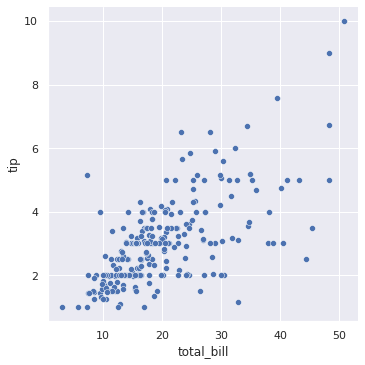

In [23]:
tips = sns.load_dataset("tips")
sns.relplot(x="total_bill", y="tip", data=tips);

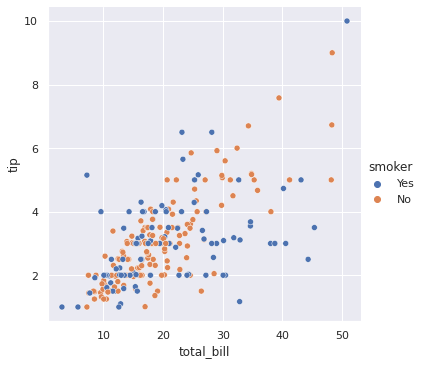

In [24]:
# Agregar dimensiones extra con colores
sns.relplot(x="total_bill", y="tip", hue="smoker", data=tips);

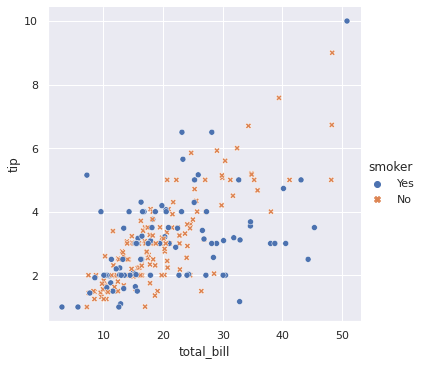

In [25]:
# Con formas
sns.relplot(x="total_bill", y="tip", hue="smoker", style="smoker", data=tips);

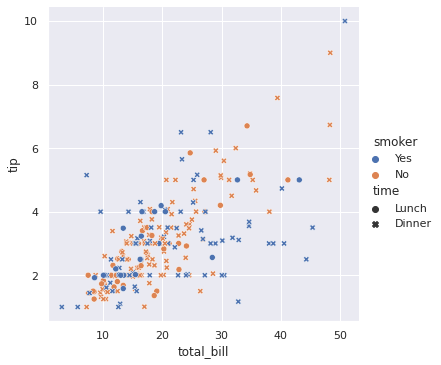

In [26]:
# Agregar multiples variables 
sns.relplot(x="total_bill", y="tip", hue="smoker", style="time", data=tips);

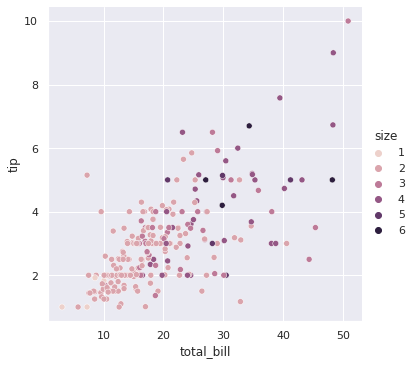

In [27]:
# Agregar dimensiones adicionales continuas
sns.relplot(x="total_bill", y="tip", hue="size", data=tips);

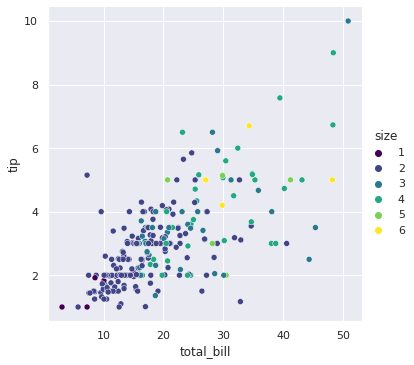

In [28]:
sns.relplot(x="total_bill", y="tip", hue="size", data=tips, palette="viridis");

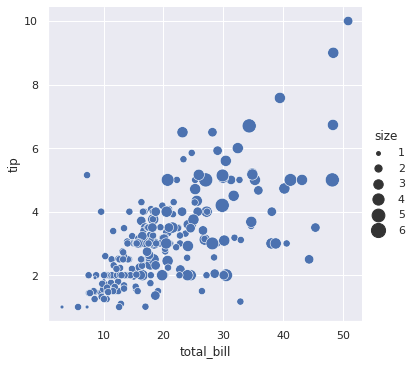

In [29]:
sns.relplot(x="total_bill", y="tip", size="size", sizes=(15, 200), data=tips);

In [62]:
df = pd.DataFrame(dict(time=np.arange(500),
                       value=np.random.randn(500).cumsum()))
df.head()

,time,value
0,0,2.372780
1,1,2.457319
2,2,1.598707
3,3,1.702732
4,4,0.325146


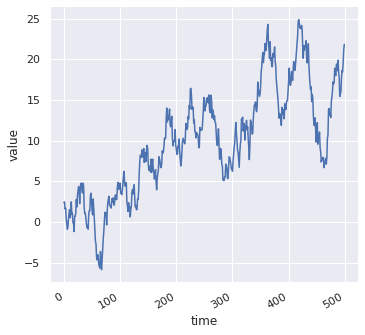

In [64]:
# El comportamiento usual es ordenar primero las "x" y luego dibujar "y"
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

 

In [65]:
df = pd.DataFrame(np.random.randn(500, 2).cumsum(axis=0), columns=["x", "y"])
df.head()

,x,y
0,-1.730628,-0.144023
1,-3.293316,-1.350257
2,-3.642008,-3.074261
3,-5.301258,-3.152711
4,-4.990198,-2.232621


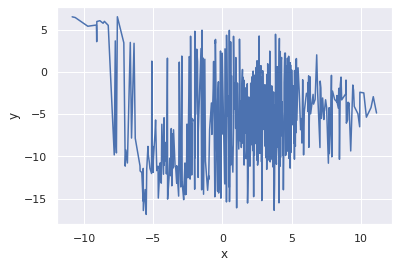

In [55]:
sns.lineplot(x="x", y="y", data=df);

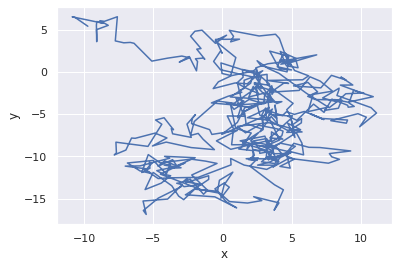

In [56]:
sns.lineplot(x="x", y="y", sort=False, data=df);

In [41]:
fmri = sns.load_dataset("fmri")
fmri.head()

,subject,timepoint,event,region,signal
0,s13,18,stim,parietal,-0.017552
1,s5,14,stim,parietal,-0.080883
2,s12,18,stim,parietal,-0.081033
3,s11,18,stim,parietal,-0.046134
4,s10,18,stim,parietal,-0.037970


En este caso hay varias observaciones `timepoint` con distinto valor de `signal`, entonces `lineplot` hace lo siguiente 

- Remueve las repeticiones usando un estimador de ellas. Por defecto es el promedio. 
- Se estima un intervalo de 95% usando bootstrap.  

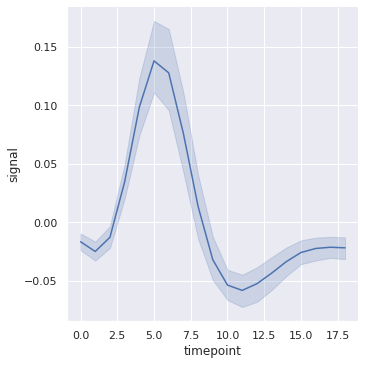

In [57]:
sns.relplot(x="timepoint", y="signal", kind="line", data=fmri);

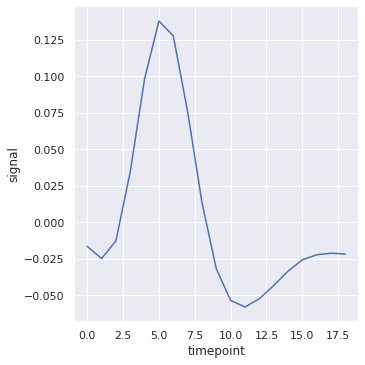

In [66]:
sns.relplot(x="timepoint", y="signal", ci=None, kind="line", data=fmri);

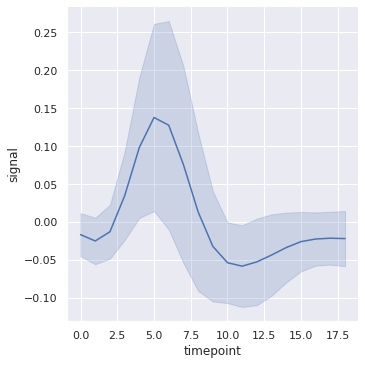

In [67]:
sns.relplot(x="timepoint", y="signal", kind="line", ci="sd", data=fmri);

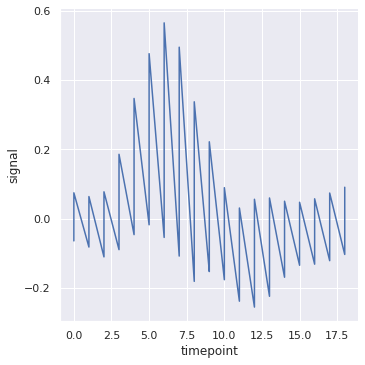

In [77]:
sns.relplot(x="timepoint", y="signal", estimator=None, kind="line", data=fmri);

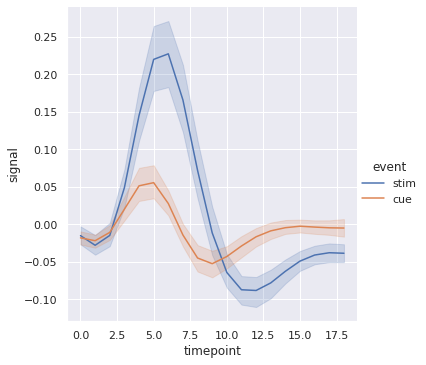

In [70]:
sns.relplot(x="timepoint", y="signal", hue="event", kind="line", data=fmri);

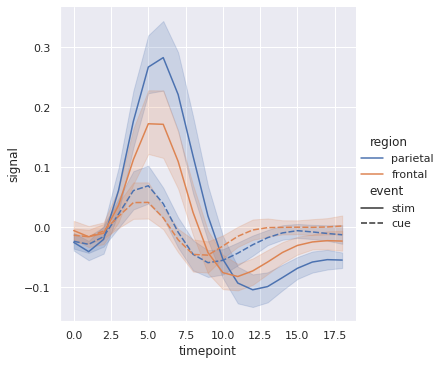

In [72]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", kind="line", data=fmri);

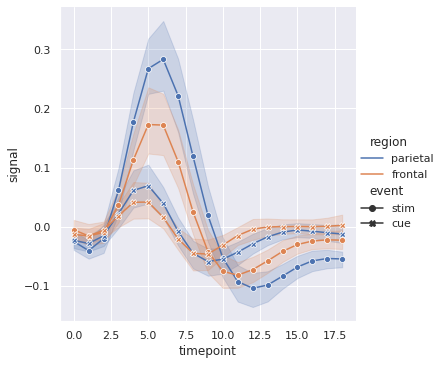

In [73]:
sns.relplot(x="timepoint", y="signal", hue="region", style="event", dashes=False,
            markers=True, kind="line", data=fmri);

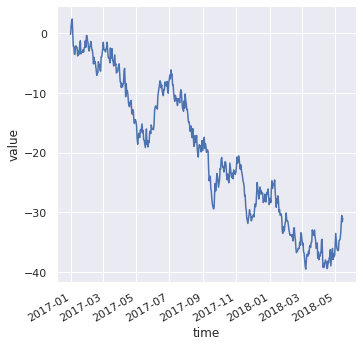

In [80]:
df = pd.DataFrame(dict(time=pd.date_range("2017-1-1", periods=500),
                       value=np.random.randn(500).cumsum()))
g = sns.relplot(x="time", y="value", kind="line", data=df)
g.fig.autofmt_xdate()

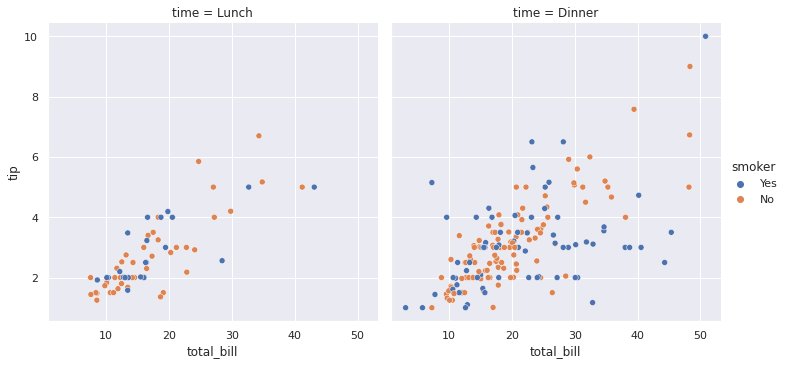

In [81]:
sns.relplot(x="total_bill", y="tip", hue="smoker",
            col="time", data=tips);

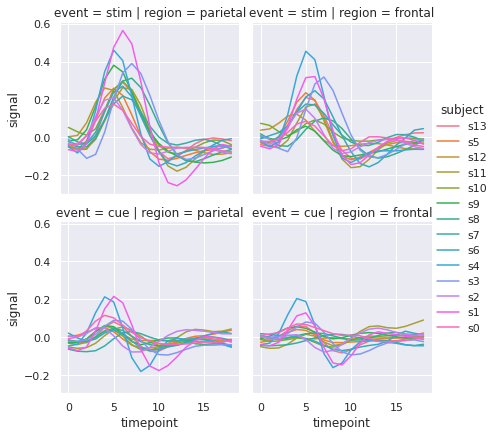

In [82]:
# Usando el parámetro row pueden dibujar por filas el contenido del data.frame
sns.relplot(x="timepoint", y="signal", hue="subject",
            col="region", row="event", height=3,
            kind="line", estimator=None, data=fmri);

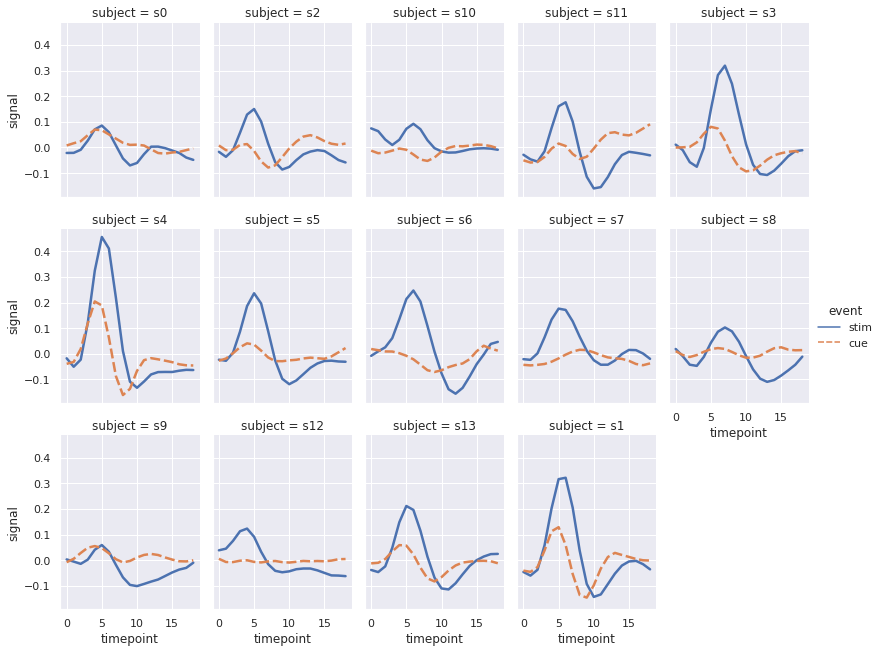

In [83]:
sns.relplot(x="timepoint", y="signal", hue="event", style="event",
            col="subject", col_wrap=5,
            height=3, aspect=.75, linewidth=2.5,
            kind="line", data=fmri.query("region == 'frontal'"));

# Visualizando distribuciones. 

Como se mencionó al inicio de este libro, la función `displot` puede dibujar distribuciones de forma bastante sencilla en `seaborn`. 


